In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.neighbors.nearest_centroid import NearestCentroid
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
f = r'C:\Users\jflan\Downloads\Merged_Employment_Wages_in_Colorado.csv'


In [156]:
import sys
print(sys.executable)

C:\Users\jflan\Anaconda3\python.exe


In [157]:
#C:\Users\jflan\Anaconda3\python -m pip install wordcloud

In [158]:
df= pd.read_csv(f)
print(len(df))

19598


In [159]:
#let's remove all rows with missing data
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df.isnull().any()

Unnamed: 0    False
areaname      False
periodyear    False
codetitle     False
empcount      False
mean          False
entrywg       False
experience    False
pct10         False
pct25         False
median        False
pct75         False
pct90         False
population    False
dtype: bool

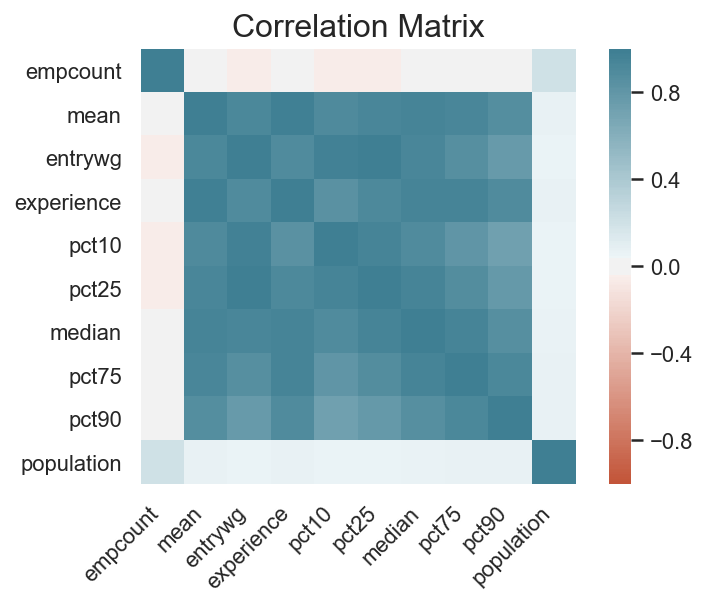

In [160]:
#let's run a basic correlation matrix on a few of our variables.
#Mean
#entrywg
#experience
#empcount
#periodyear
corrdf=df[df.columns[df.columns.isin(['mean','entrywg','experience','empcount','pct10','pct25','pct75','pct90','population','median'])]]

corr = corrdf.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Matrix', fontsize=16);




In [161]:
#let's get some estimated coefficients to see the degree to which these variables effect mean
X=corrdf.drop('mean',axis=1)

In [162]:
lm=LinearRegression()
lm.fit(X,df['mean'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [163]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 963.5609897620525


In [164]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

features  estimatedCoefficients
0    empcount              -0.006506
1     entrywg              -1.501043
2  experience               0.679485
3       pct10               1.120744
4       pct25               0.697634
5      median               0.013006
6       pct75              -0.010791
7       pct90              -0.002175
8  population              -0.000088

(array([8.000e+00, 0.000e+00, 9.940e+02, 2.428e+03, 2.702e+03, 2.439e+03,
        1.995e+03, 1.479e+03, 1.123e+03, 9.130e+02, 7.110e+02, 5.410e+02,
        4.160e+02, 2.710e+02, 1.960e+02, 1.370e+02, 8.700e+01, 6.100e+01,
        4.200e+01, 2.500e+01, 1.500e+01, 1.400e+01, 9.000e+00, 5.000e+00,
        8.000e+00, 8.000e+00, 7.000e+00, 6.000e+00, 2.000e+00, 3.000e+00]),
 array([   747.90036574,   8199.57556801,  15651.25077029,  23102.92597256,
         30554.60117483,  38006.27637711,  45457.95157938,  52909.62678165,
         60361.30198393,  67812.9771862 ,  75264.65238847,  82716.32759075,
         90168.00279302,  97619.6779953 , 105071.35319757, 112523.02839984,
        119974.70360212, 127426.37880439, 134878.05400666, 142329.72920894,
        149781.40441121, 157233.07961348, 164684.75481576, 172136.43001803,
        179588.10522031, 187039.78042258, 194491.45562485, 201943.13082713,
        209394.8060294 , 216846.48123167, 224298.15643395]),
 <a list of 30 Patch objects>)

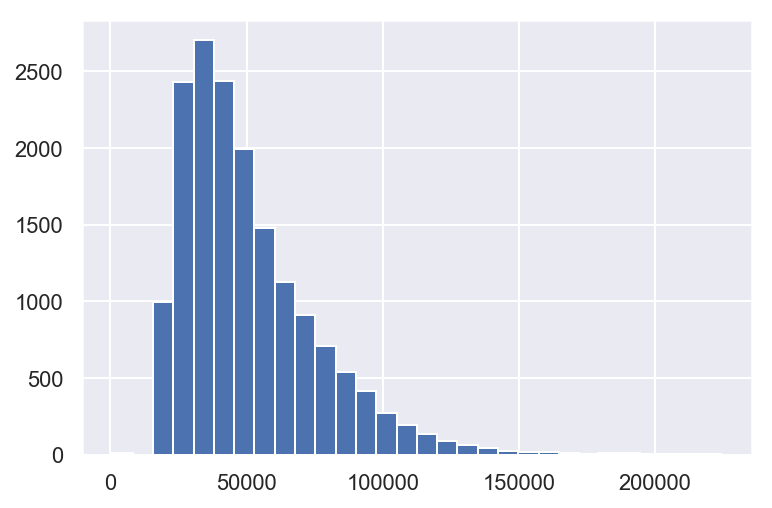

In [165]:
predictedprices=lm.predict(X)
plt.hist(predictedprices,bins=30)


Text(0.5,1,'predicted prices vs actual mean')

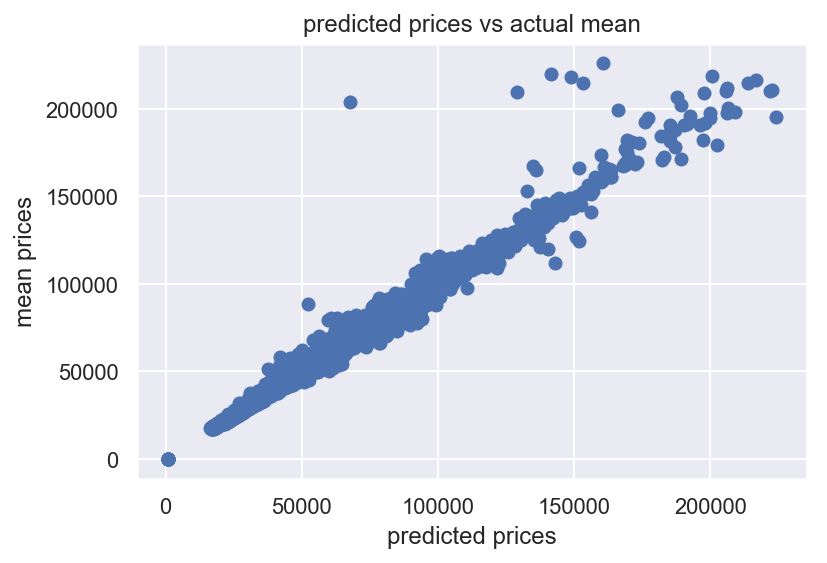

In [166]:
plt.scatter(predictedprices,df['mean'])
plt.ylabel('mean prices')
plt.xlabel('predicted prices')
plt.title('predicted prices vs actual mean')

In [167]:
df['quantile'] =pd.qcut(df['mean'],3,labels=['bottom','mid','top'])
print(df['quantile'].head())
print(len(df))
print(len(df['quantile']))

278    top
279    top
281    top
282    top
283    top
Name: quantile, dtype: category
Categories (3, object): [bottom < mid < top]
16645
16645


In [168]:
ol= ols('mean ~ entrywg + experience + empcount + pct10 + pct25 + pct75 + pct90 + population+median',df).fit()
print(ol.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.838e+05
Date:                Fri, 09 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:49:15   Log-Likelihood:            -1.5402e+05
No. Observations:               16645   AIC:                         3.081e+05
Df Residuals:                   16635   BIC:                         3.081e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.5610     51.165     18.832      0.0

In [169]:
ol= ols('mean ~ empcount + experience + population',df).fit()
print(ol.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.265e+05
Date:                Fri, 09 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:49:15   Log-Likelihood:            -1.6600e+05
No. Observations:               16645   AIC:                         3.320e+05
Df Residuals:                   16641   BIC:                         3.320e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2603.0587     93.253     27.914      0.0

In [170]:
ol= ols('mean ~empcount + population + experience',df).fit()
print(ol.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 1.265e+05
Date:                Fri, 09 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:49:15   Log-Likelihood:            -1.6600e+05
No. Observations:               16645   AIC:                         3.320e+05
Df Residuals:                   16641   BIC:                         3.320e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2603.0587     93.253     27.914      0.0

In [171]:
df['quantile'] =pd.qcut(df['mean'],3,labels=['bottom','mid','top'])
print(df['quantile'].head())
print(len(df))
print(len(df['quantile']))

278    top
279    top
281    top
282    top
283    top
Name: quantile, dtype: category
Categories (3, object): [bottom < mid < top]
16645
16645


In [172]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df[['empcount','population','experience']].values, 
                                              (df['quantile']=="top").values,random_state=5)

clf=LogisticRegression()
clf.fit(Xlr,ylr)
print(accuracy_score(clf.predict(Xtestlr),ytestlr))


0.4680442095146564


In [173]:
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 10
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

0.4818581146968858


In [174]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df[['empcount','population']].values, 
                                              (df['quantile']=="top").values,random_state=5)

clf=LogisticRegression()
clf.fit(Xlr,ylr)
print(accuracy_score(clf.predict(Xtestlr),ytestlr))


0.6693897164824604


In [175]:
def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 10
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

0.6657808297920388


In [176]:
pivot_table = pd.pivot_table(df, values='mean', index='codetitle', columns='areaname', aggfunc=sum, fill_value=0)

In [177]:
x_cols=pivot_table.columns[:]

k_range=range(1,11)
ss=[]  

Text(0,0.5,'ss')

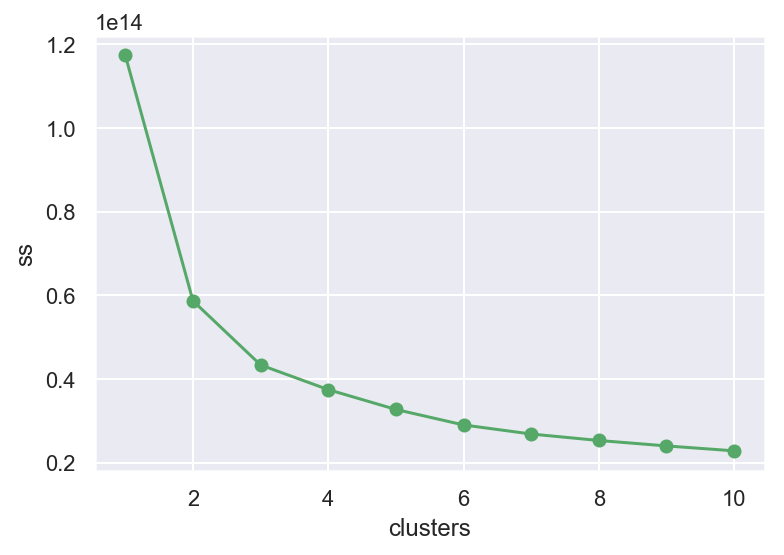

In [178]:
for k in k_range:
    kmeans_model=KMeans(n_clusters=k,random_state=10).fit(pivot_table[x_cols])
    ss.append(kmeans_model.inertia_)
plt.plot(k_range,ss,'go-')
plt.xlabel("clusters")
plt.ylabel("ss")

Text(0.5,1,'cluister size')

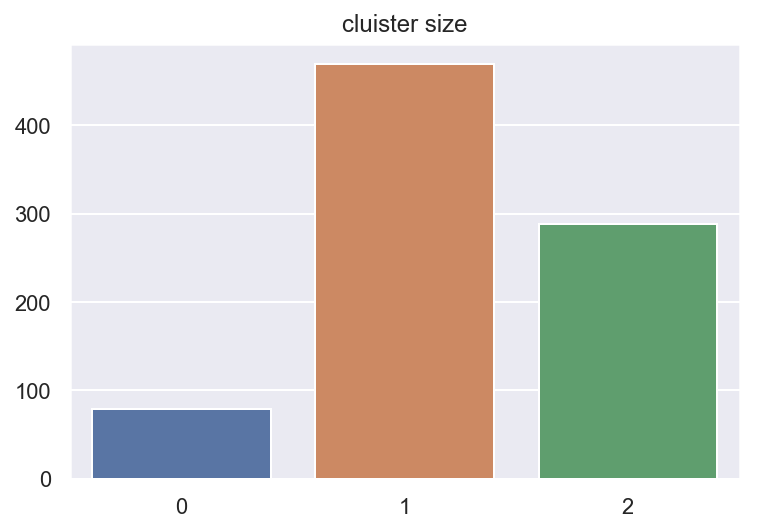

In [179]:
model=KMeans(n_clusters=3,random_state=10).fit(pivot_table[x_cols])
clusters=model.predict(pivot_table[x_cols])
cluster_totals=np.bincount(clusters)
sns.barplot(x=[0,1,2],y=cluster_totals)
plt.title('cluister size')

Text(0.5,1,'PCA')

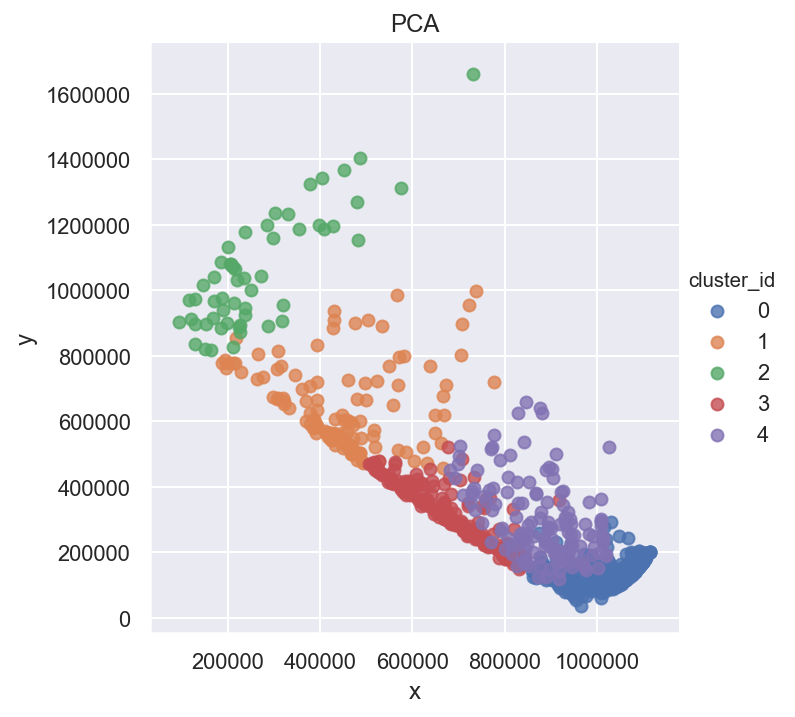

In [192]:
#Let's run PCA and see how spread the Data is
from sklearn.decomposition import PCA

pca_model= PCA(n_components=2)
pca_columns=model.fit_transform(pivot_table[x_cols])

X= pca_columns[:,0]
y= pca_columns[:,1]

best_model = KMeans(n_clusters=5, random_state=10).fit(pivot_table[x_cols])
clusters = best_model.predict(pivot_table[x_cols])

df_pca = pd.DataFrame(pivot_table.index)

df_pca['codetitle'] = pivot_table.index
df_pca['cluster_id'] = clusters
df_pca['x'] = X
df_pca['y'] = y

sns.lmplot(x='x', y='y', data=df_pca, hue='cluster_id', fit_reg=False)
plt.title('PCA')

In [181]:
df_new = pd.merge_ordered(df, df_pca, how='outer', on='codetitle')
#df_new.head(10)
#df_new[''].unique()

In [182]:
df_new['codetitle']=df_new['codetitle'].str.replace(',','')

In [183]:
crosstab= pd.crosstab(df_new['cluster_id'], df_new['codetitle'])
crosstab=pd.crosstab(df_new['cluster_id'],df_new['codetitle']).apply(lambda c: c/c.sum(), axis=0
)
print(crosstab)

codetitle   Accountants and Auditors  Actors  Actuaries  \
cluster_id                                                
0                                1.0     0.0        0.0   
1                                0.0     1.0        1.0   
2                                0.0     0.0        0.0   

codetitle   Adhesive Bonding Machine Operators and Tenders  \
cluster_id                                                   
0                                                      0.0   
1                                                      1.0   
2                                                      0.0   

codetitle   Administrative Law Judges Adjudicators and Hearing Officers  \
cluster_id                                                                
0                                                                   0.0   
1                                                                   1.0   
2                                                                   0.0   

codetitle   Admin

In [184]:
#let's see what the most popular code title is

Text(0.5,1,'occurance of a codetitle')

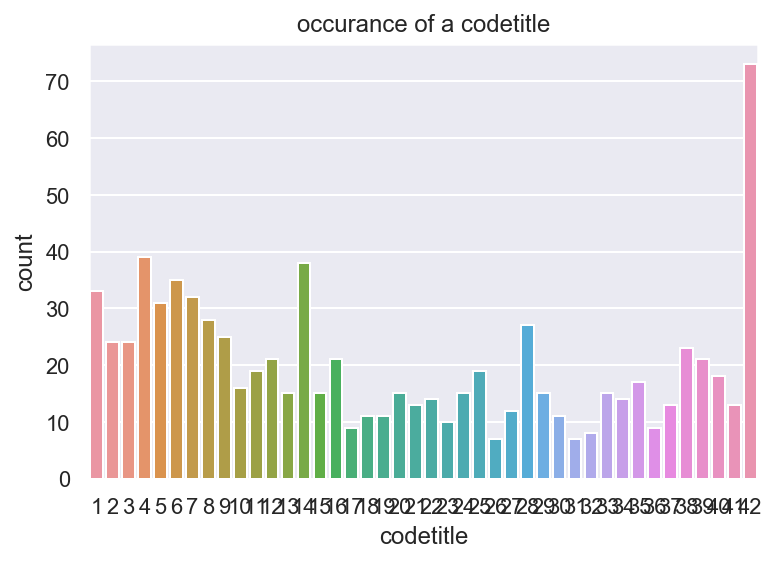

In [185]:
codeplot=df_new['codetitle'].value_counts()
sns.countplot(codeplot)
sns.set(rc={'figure.figsize':(20,8.27)})
plt.title('occurance of a codetitle')

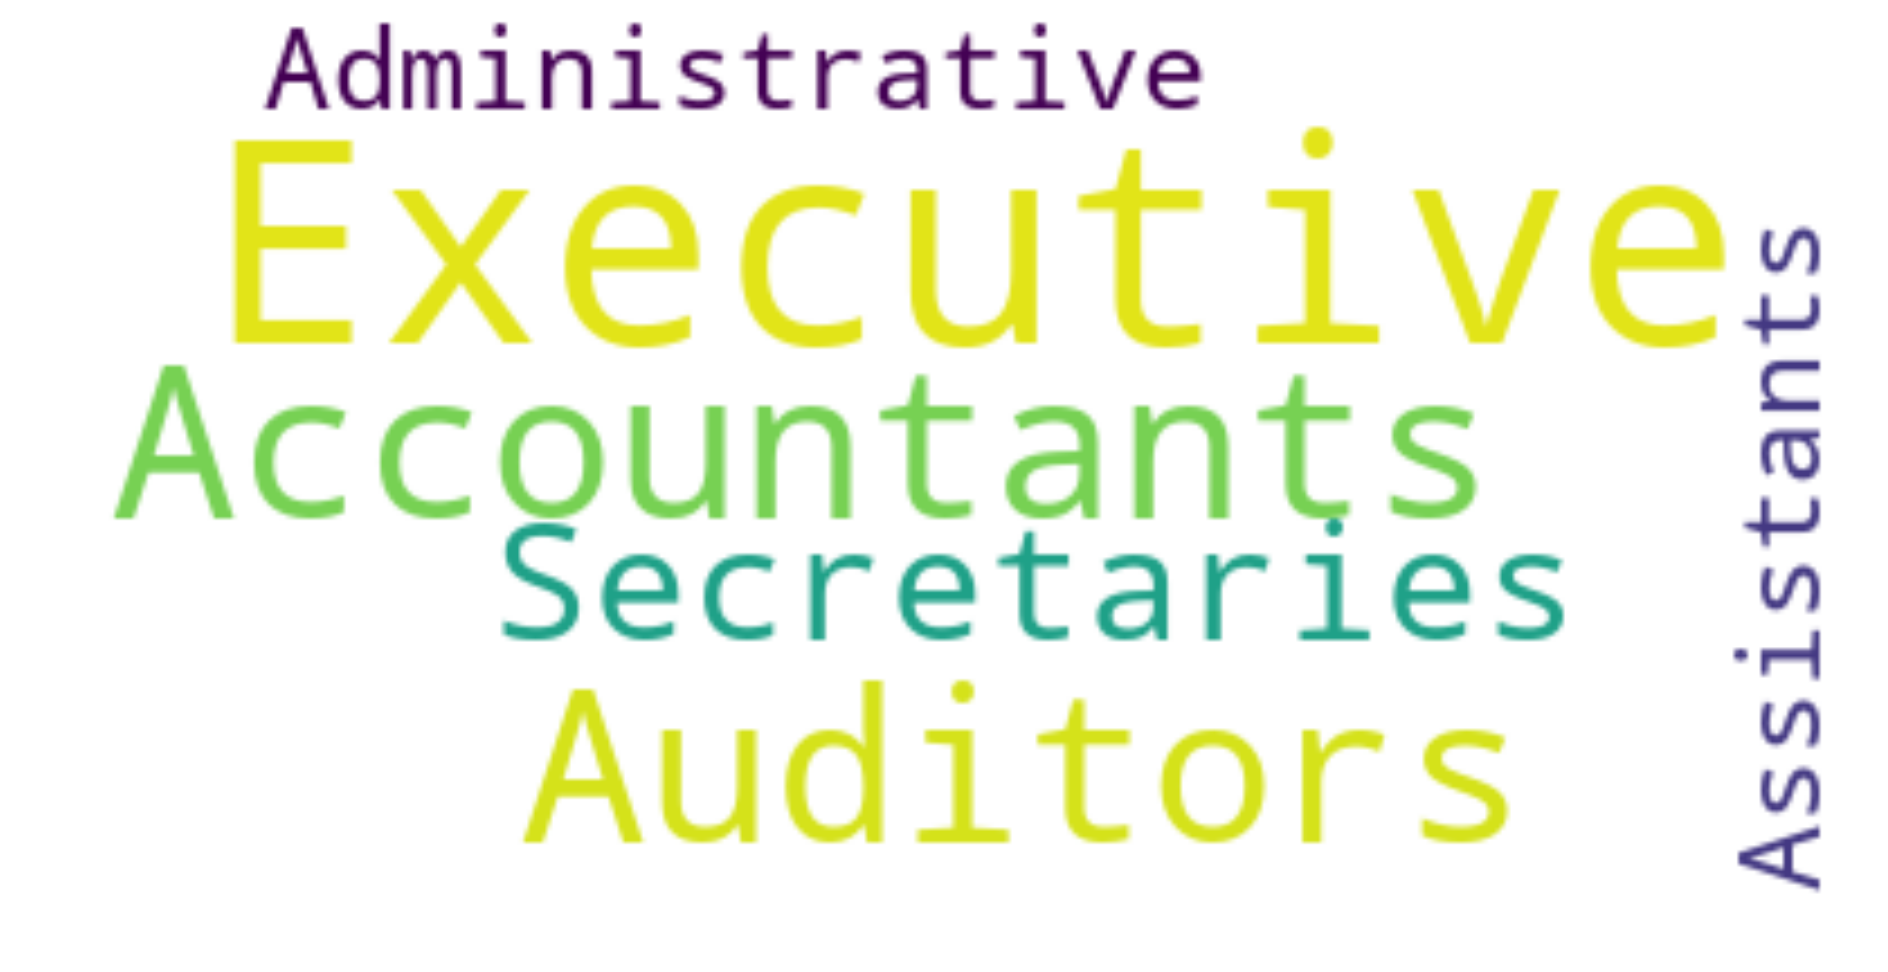

In [186]:
stopwords.update(['cluster_id','varietal','index','empty','DataFrame','Columns','codetitle','and','all','other','except','dtype','int64','name'])
text= codeplot[:i].head(72)
text.values.tolist()
text=str(text)
wordcloud= WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

codetitlect = pd.crosstab(df_new['cluster_id'], df_new['codetitle']).plot(kind='bar', figsize=(8,5))
_ = plt.title('Campaign')
_ = plt.xlabel('Cluster')
_ = plt.xticks(range(0,6), ('0', '1', '2','3','4','5'), rotation=0) 
_ = plt.ylabel('Count')
_ = plt.legend([df_new['codetitle'].unique()])

In [187]:
#Let's see how much weight each word has
s = df_new['codetitle'].str.split(expand=True).stack().value_counts()
print(s.head(20))

and            9597
Workers        1716
Other          1141
All            1137
Operators      1076
Technicians     961
Except          859
Clerks          857
Service         827
Teachers        762
Occupations     732
Machine         724
of              709
Managers        705
Supervisors     629
First-Line      577
Education       565
Computer        543
Specialists     531
Engineers       507
dtype: int64


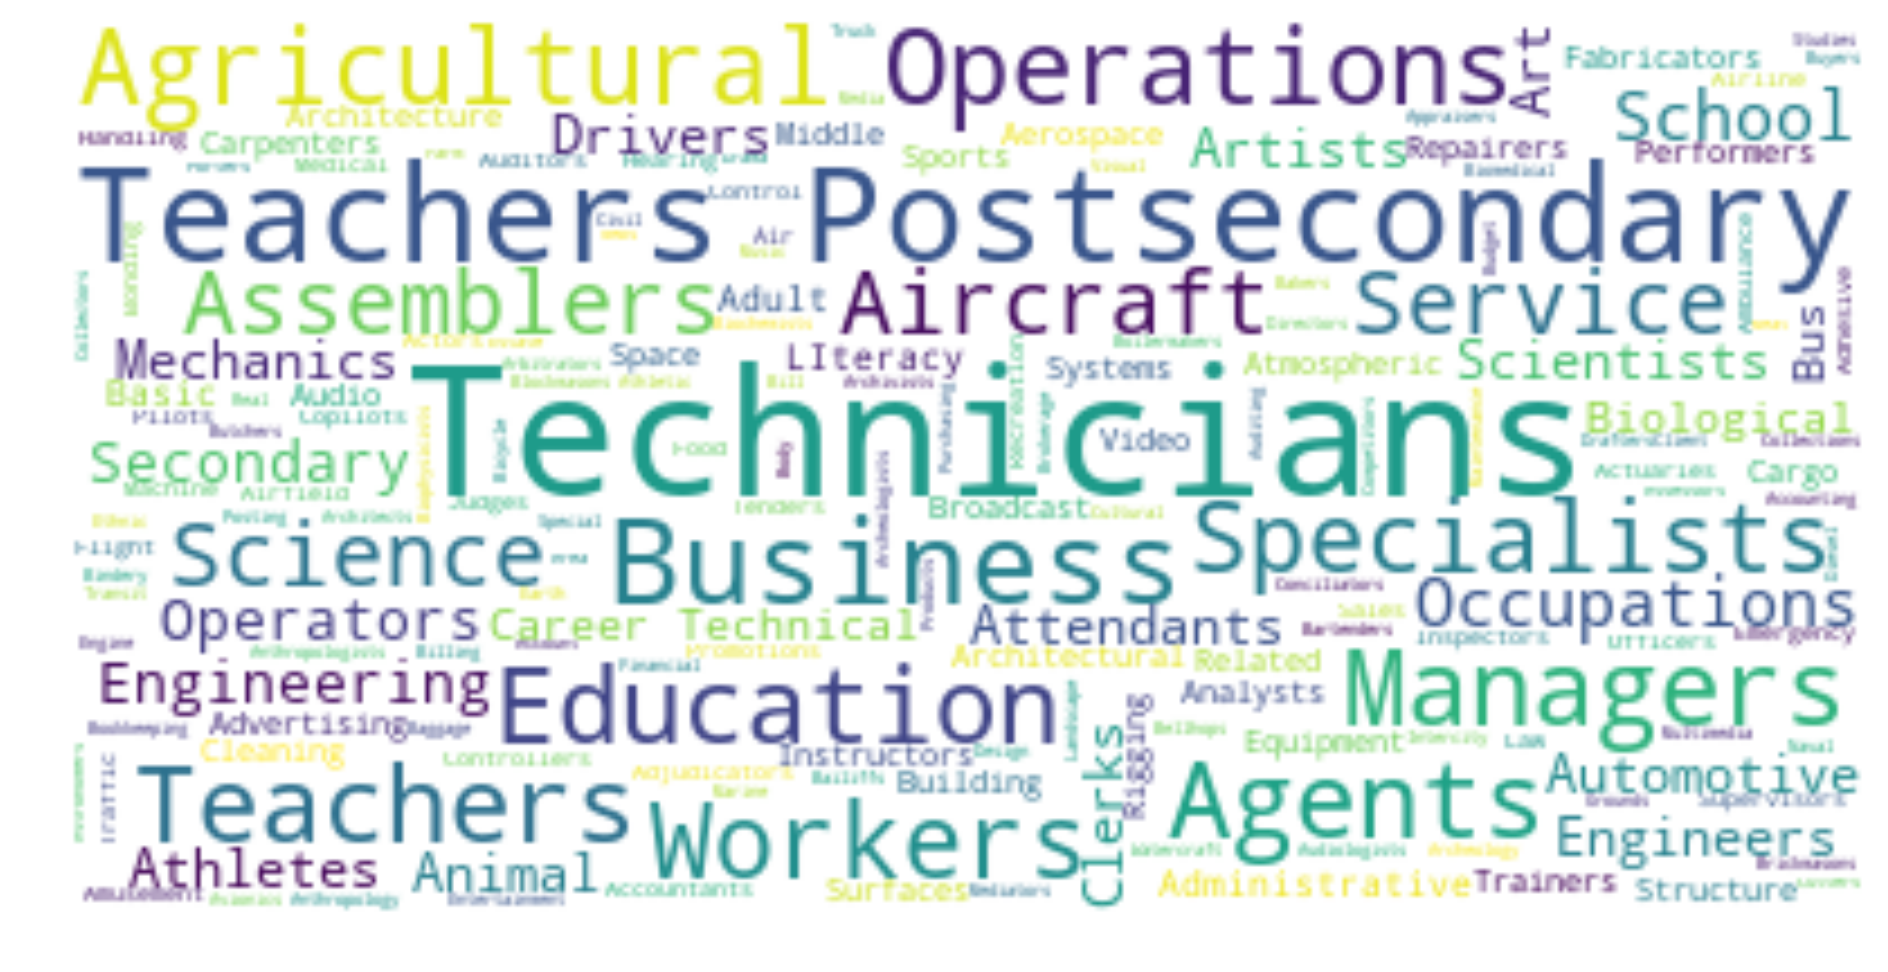

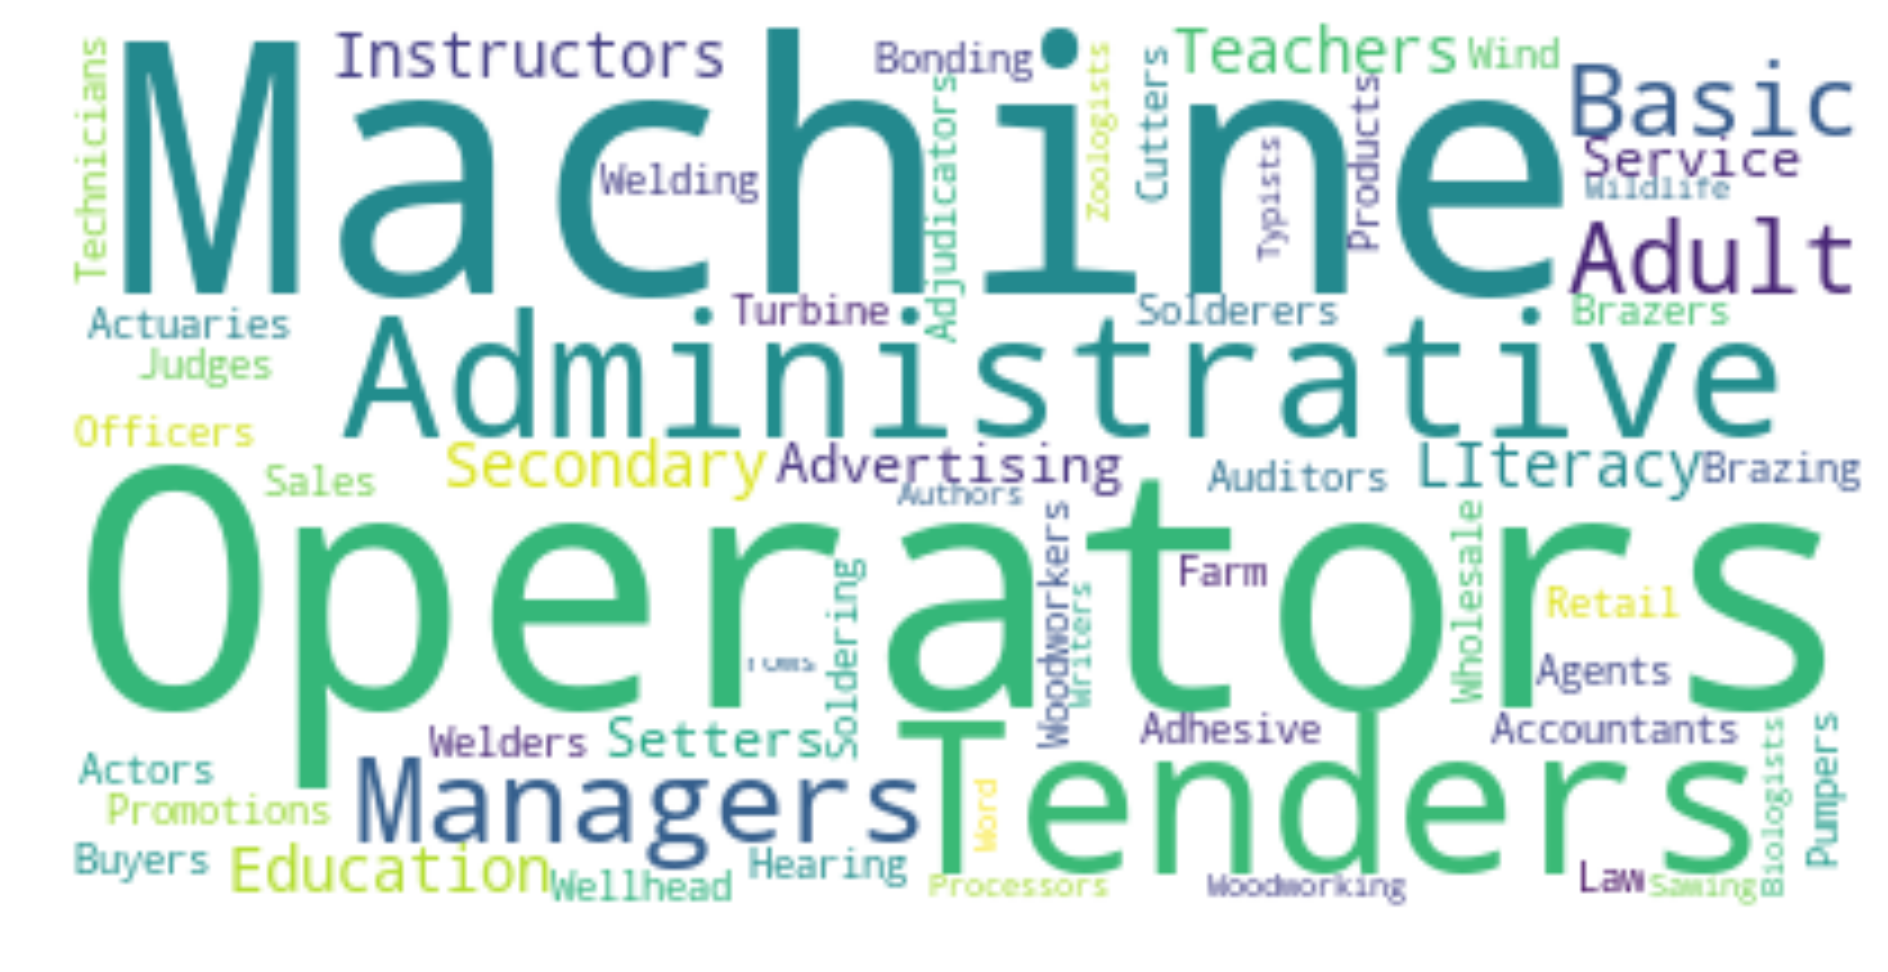

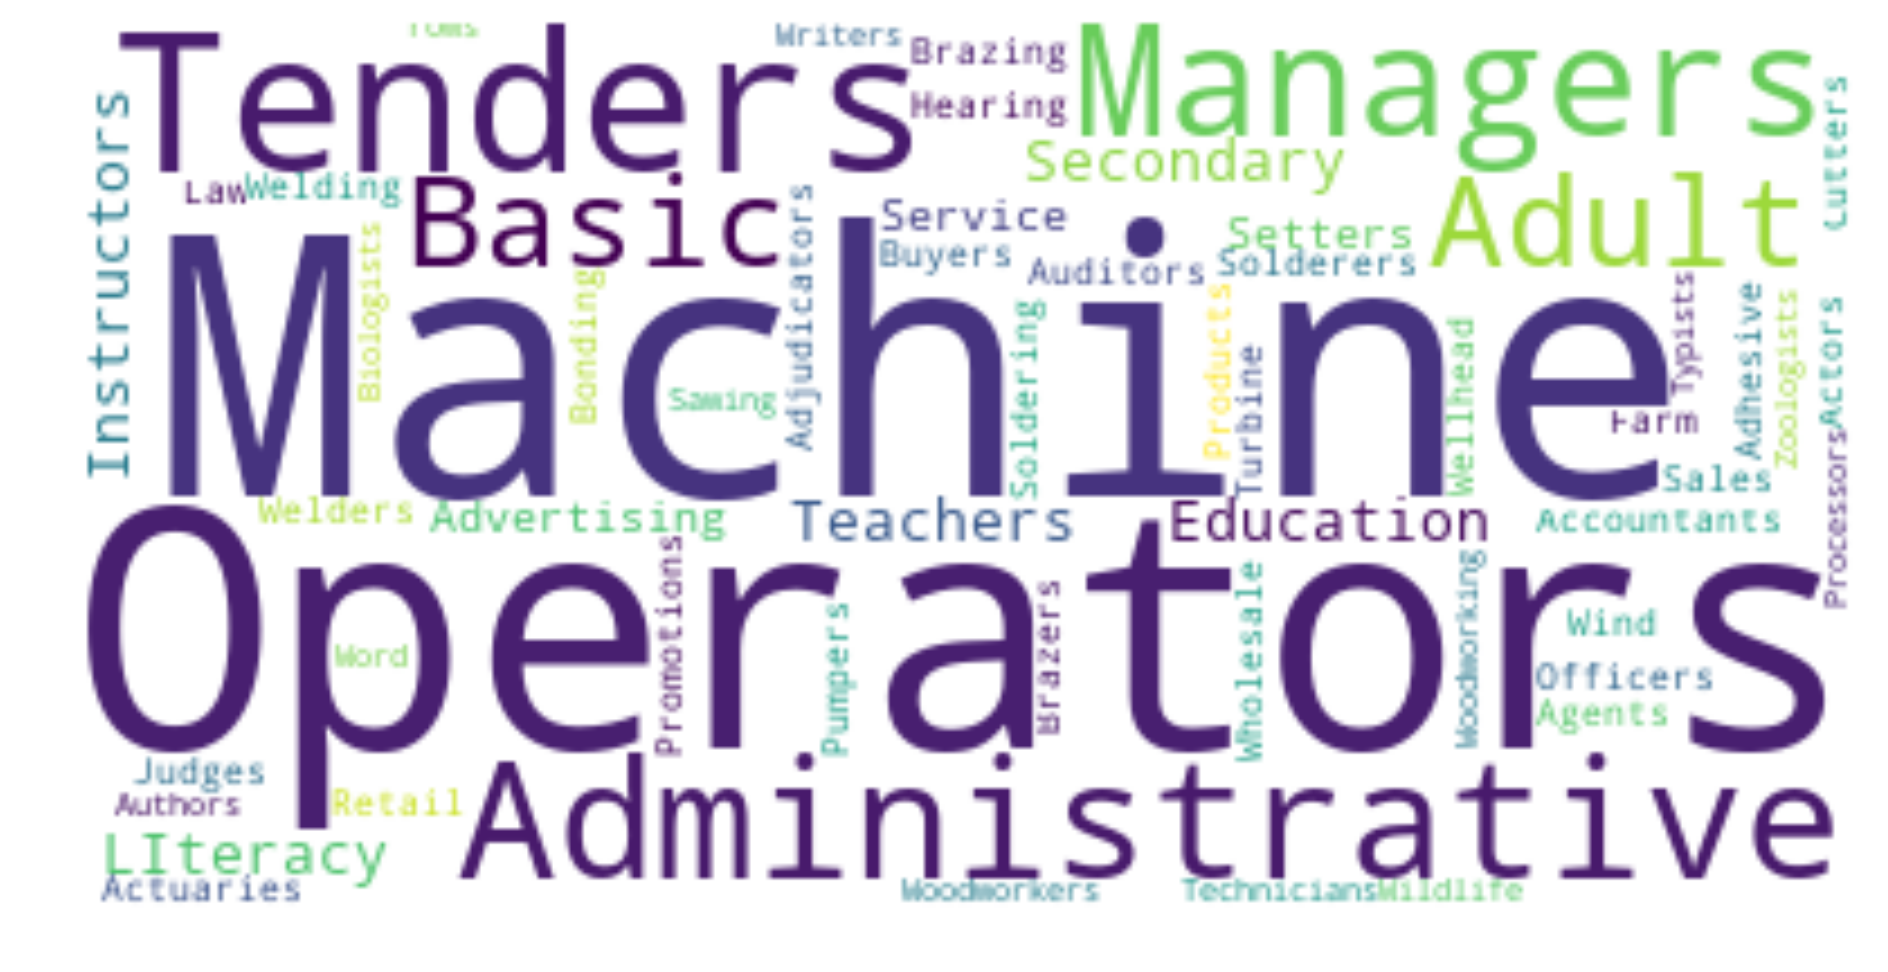

In [188]:
stopwords= set(STOPWORDS)
stopwords.update(['cluster_id','varietal','index','empty','DataFrame','Columns','codetitle','and','all','other','except','of',','])
for i in range(0,3):
    text= crosstab[:i]
    text.values.tolist()
    text=str(text)
    wordcloud= WordCloud(stopwords=stopwords,background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [193]:
crosstab_area= pd.crosstab(df_new['cluster_id'], df_new['areaname'])
crosstab_area=pd.crosstab(df_new['cluster_id'],df_new['areaname']).apply(lambda c: c/c.sum(), axis=0
)
print(crosstab_area)

areaname    Boulder-Longmont MSA  Colorado Springs MSA  Denver - Aurora MSA  \
cluster_id                                                                    
0                       0.167216              0.153232             0.112493   
1                       0.267298              0.326797             0.461871   
2                       0.565486              0.519971             0.425635   

areaname    Fort Collins-Loveland MSA  Grand Junction MSA  Greeley MSA  \
cluster_id                                                               
0                            0.180085            0.191513     0.191601   
1                            0.256356            0.222781     0.234646   
2                            0.563559            0.585706     0.573753   

areaname    Pueblo MSA  
cluster_id              
0             0.205383  
1             0.204213  
2             0.590404  


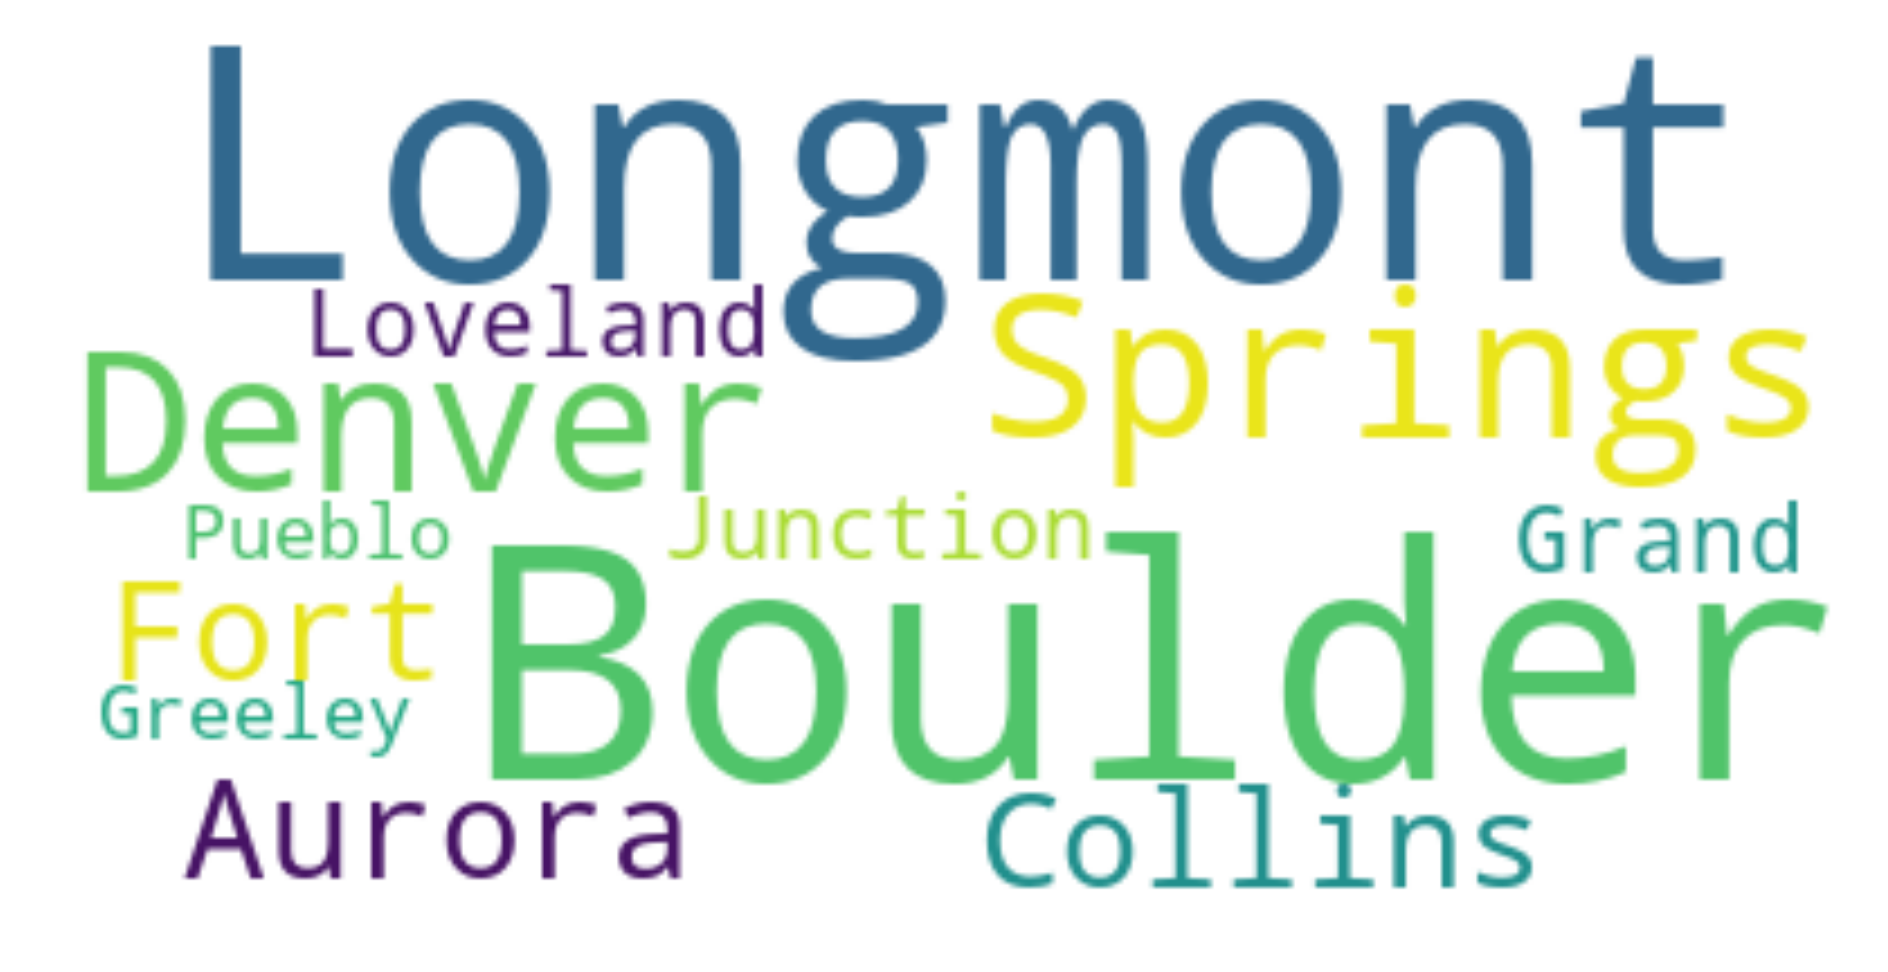

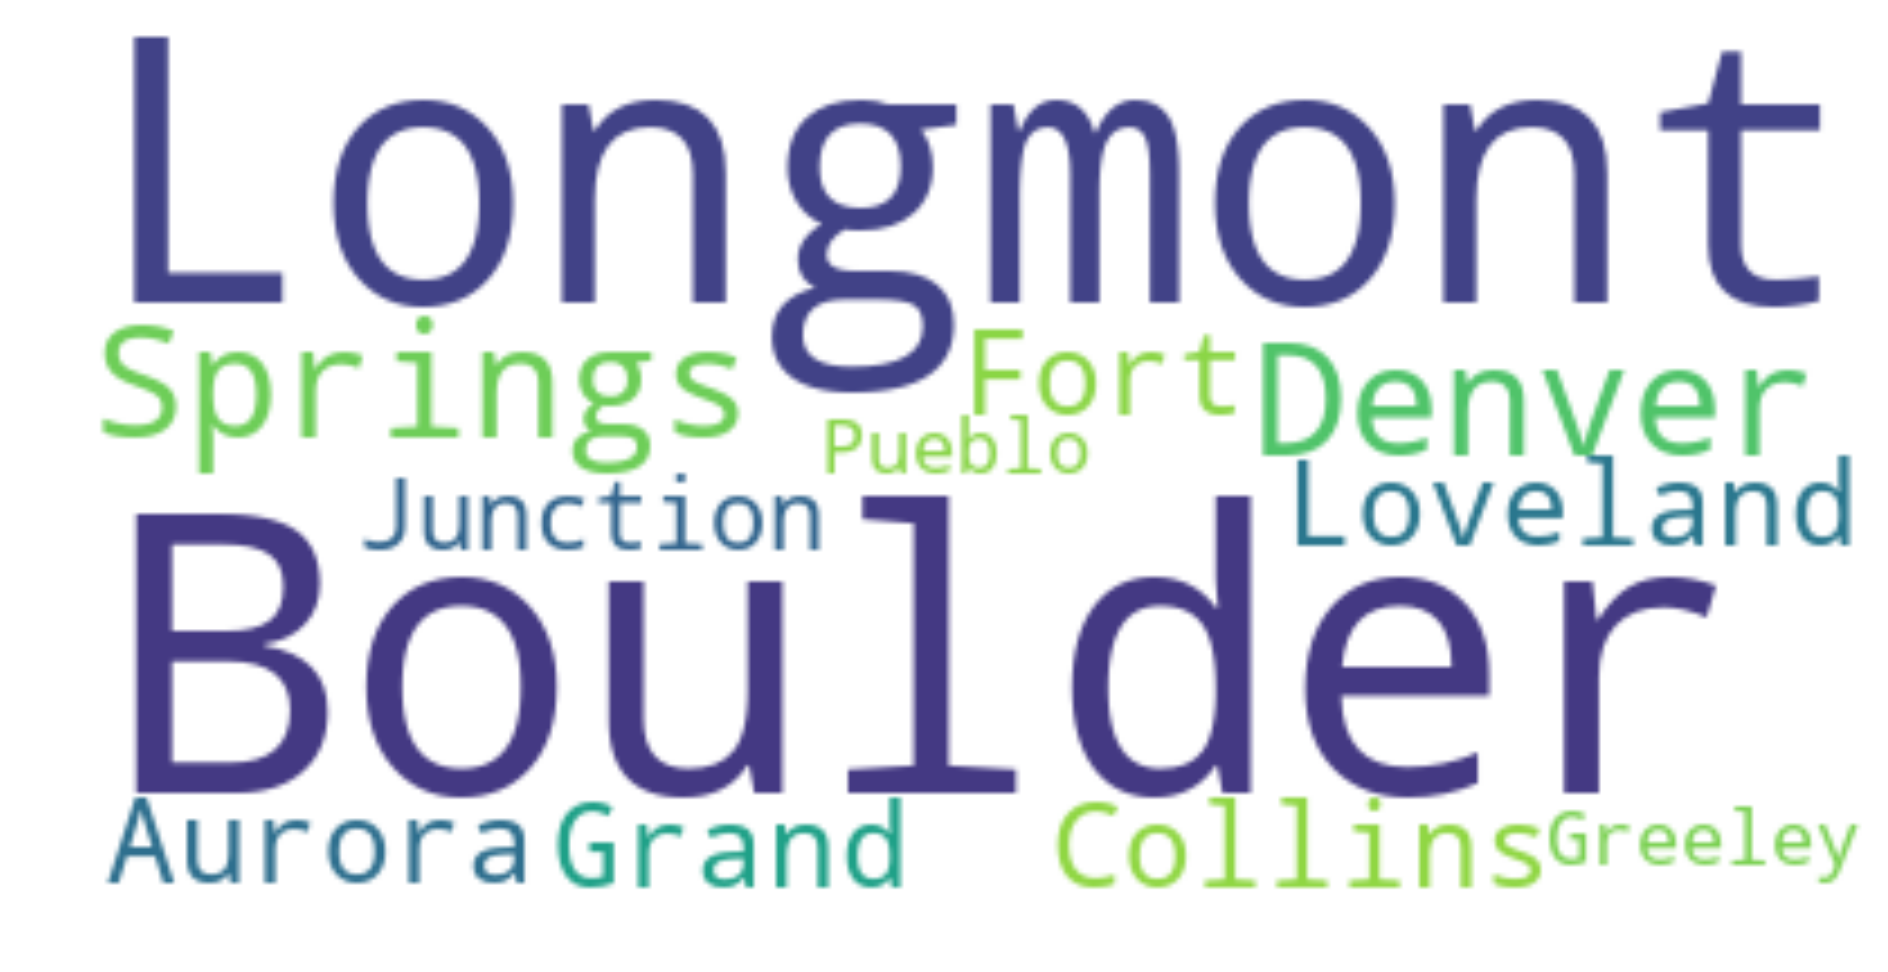

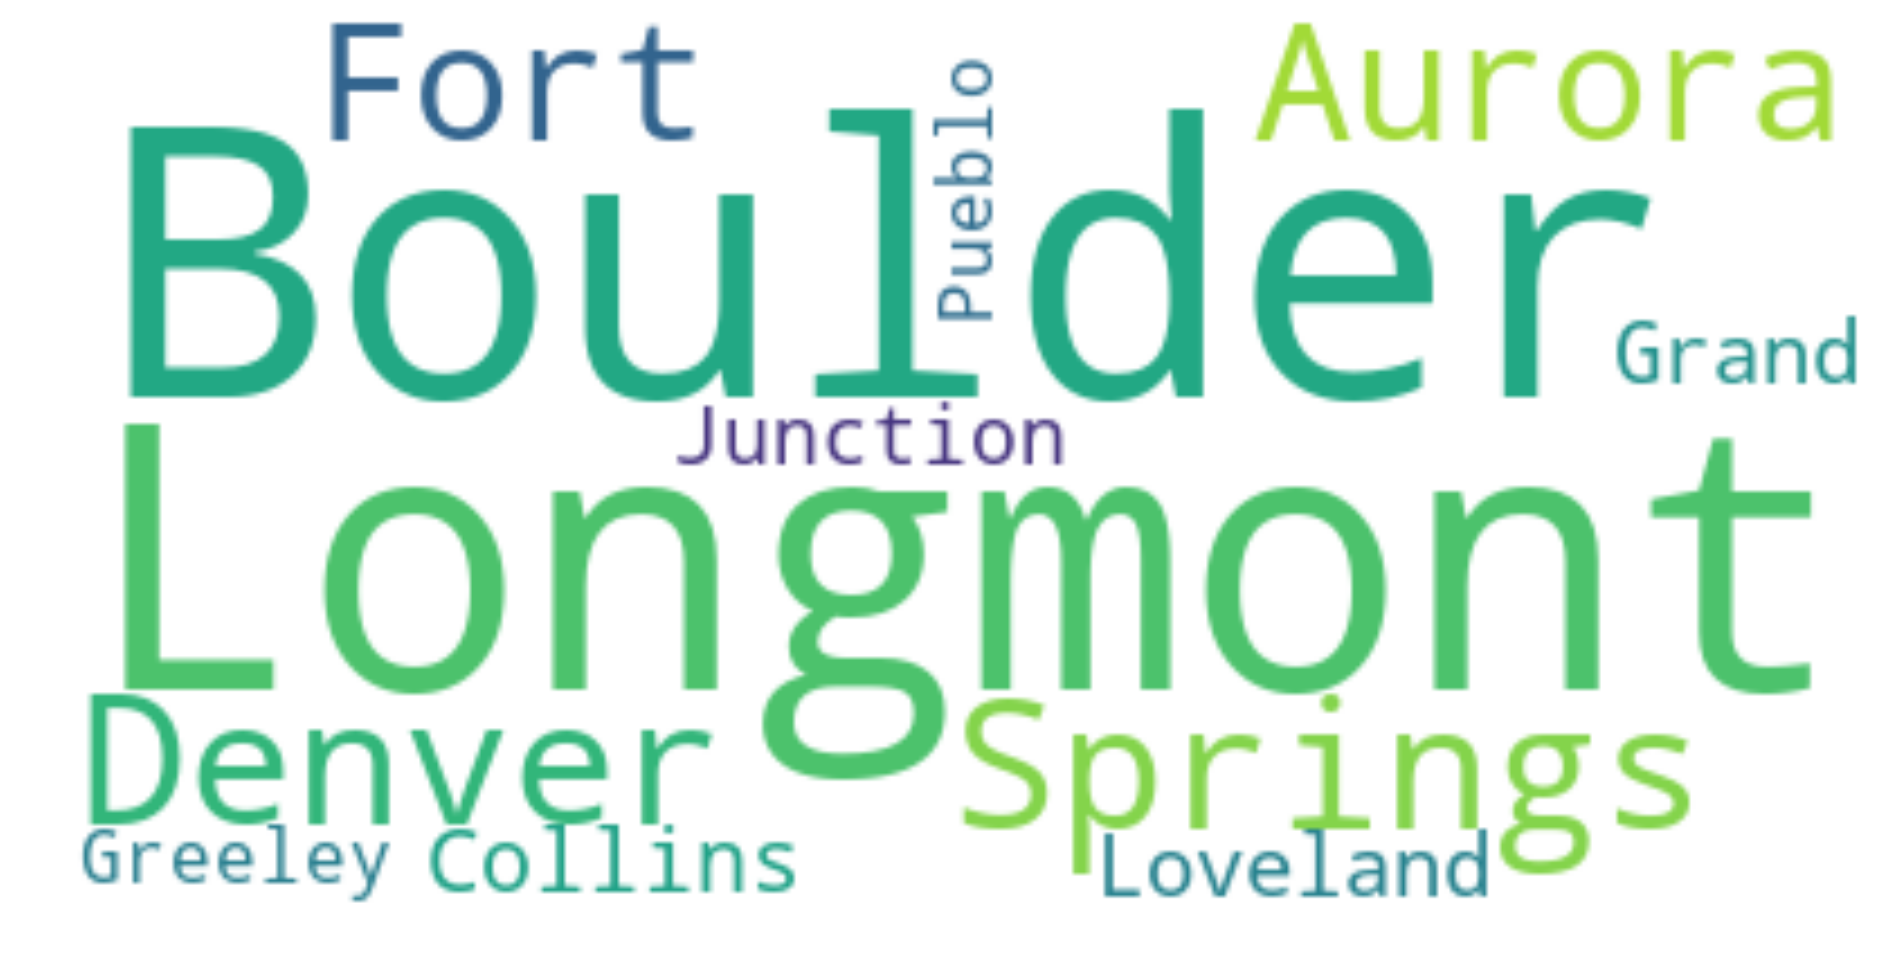

In [197]:
stopwords= set(STOPWORDS)
stopwords.update(['cluster_id','varietal','index','empty','DataFrame','Columns','codetitle','and','all','other','except','of',',','areaname','MSA','colorado'])
for i in range(0,3):
    text= crosstab_area[:i]
    text.values.tolist()
    text=str(text)
    wordcloud= WordCloud(stopwords=stopwords,background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()